In [2]:
from tensorflow.keras.models import load_model


model = load_model('stock_prediction_model.keras')

C:\Users\Vayun\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
date_to_predict = '2023-08-15'  

In [8]:
import pandas 

In [14]:
data=pd.read_csv("NVDA.csv")
data.head()

<IPython.core.display.Javascript object>

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894729,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870838,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842169,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787218,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800358,7118400


In [16]:
last_60_days = data[data['Date'] <= date_to_predict].tail(60)  # last 60 days including the chosen date

In [18]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

close_prices = last_60_days['Close'].values.reshape(-1, 1)


scaled_close = scaler.fit_transform(close_prices)


X_input = scaled_close.reshape(1, 60, 1)

In [20]:
predicted_price_scaled = model.predict(X_input)


predicted_price = scaler.inverse_transform(predicted_price_scaled)

print("Predicted Stock Price for", date_to_predict, ":", predicted_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Predicted Stock Price for 2023-08-15 : 419.27826


C:\Users\Vayun\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

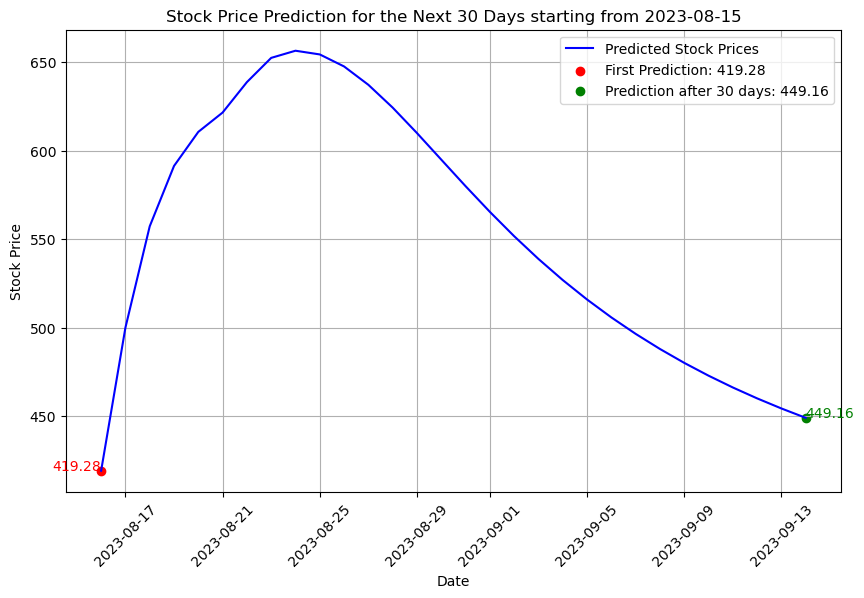

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


model = load_model('stock_prediction_model.keras')


date_to_predict = '2023-08-15' 


last_60_days = data[data['Date'] <= date_to_predict].tail(60)


scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = last_60_days['Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_prices)


X_input = scaled_close.reshape(1, 60, 1)


predicted_prices = []


for i in range(30):
    
    predicted_price_scaled = model.predict(X_input)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    
    predicted_prices.append(predicted_price[0][0])

  
    if i < 5:  
        new_data = close_prices[-1-i].reshape(1, 1, 1)  
    else:  
        new_data = predicted_price_scaled.reshape(1, 1, 1)  
    
    
    X_input = np.append(X_input[:, 1:, :], new_data, axis=1)


last_date = pd.to_datetime(date_to_predict)
date_range = pd.date_range(last_date, periods=31, freq='D')[1:] 


plt.figure(figsize=(10, 6))
plt.plot(date_range, predicted_prices, color='blue', label='Predicted Stock Prices')

plt.scatter(date_range[0], predicted_prices[0], color='red', label=f'First Prediction: {predicted_prices[0]:.2f}')

plt.scatter(date_range[29], predicted_prices[29], color='green', label=f'Prediction after 30 days: {predicted_prices[29]:.2f}')


plt.text(date_range[0], predicted_prices[0], f'{predicted_prices[0]:.2f}', color='red', ha='right', fontsize=10)
plt.text(date_range[29], predicted_prices[29], f'{predicted_prices[29]:.2f}', color='green', ha='left', fontsize=10)


plt.title(f'Stock Price Prediction for the Next 30 Days starting from {date_to_predict}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Vayun\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

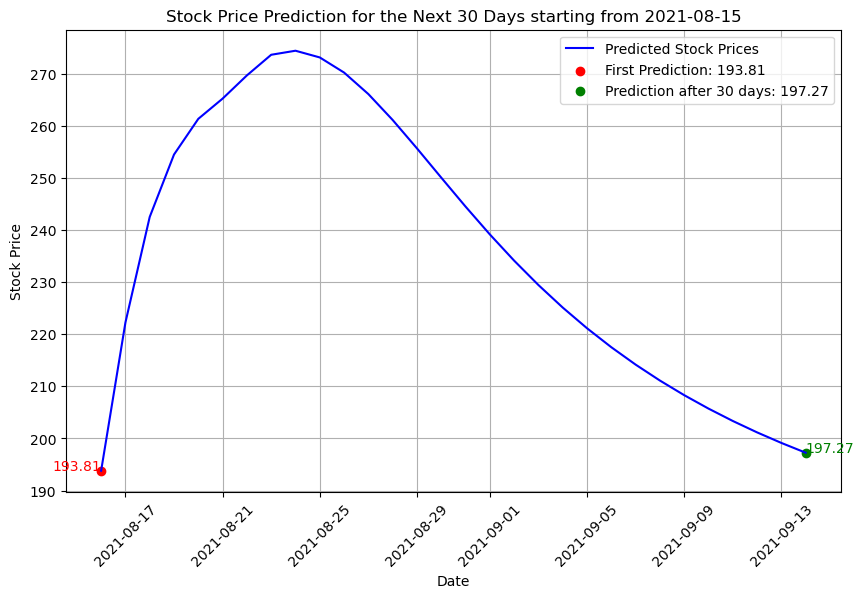

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


model = load_model('stock_prediction_model.keras')


date_to_predict = '2021-08-15' 


last_60_days = data[data['Date'] <= date_to_predict].tail(60)


scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = last_60_days['Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_prices)


X_input = scaled_close.reshape(1, 60, 1)


predicted_prices = []


for i in range(30):
    
    predicted_price_scaled = model.predict(X_input)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    
    predicted_prices.append(predicted_price[0][0])

  
    if i < 5:  
        new_data = close_prices[-1-i].reshape(1, 1, 1)  # Ensure shape is (1, 1, 1)
    else:  
        new_data = predicted_price_scaled.reshape(1, 1, 1)  # Ensure shape is (1, 1, 1)
    
    
    X_input = np.append(X_input[:, 1:, :], new_data, axis=1)


last_date = pd.to_datetime(date_to_predict)
date_range = pd.date_range(last_date, periods=31, freq='D')[1:]  # 31 because we want the next 30 days


plt.figure(figsize=(10, 6))
plt.plot(date_range, predicted_prices, color='blue', label='Predicted Stock Prices')

plt.scatter(date_range[0], predicted_prices[0], color='red', label=f'First Prediction: {predicted_prices[0]:.2f}')

plt.scatter(date_range[29], predicted_prices[29], color='green', label=f'Prediction after 30 days: {predicted_prices[29]:.2f}')


plt.text(date_range[0], predicted_prices[0], f'{predicted_prices[0]:.2f}', color='red', ha='right', fontsize=10)
plt.text(date_range[29], predicted_prices[29], f'{predicted_prices[29]:.2f}', color='green', ha='left', fontsize=10)


plt.title(f'Stock Price Prediction for the Next 30 Days starting from {date_to_predict}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Vayun\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

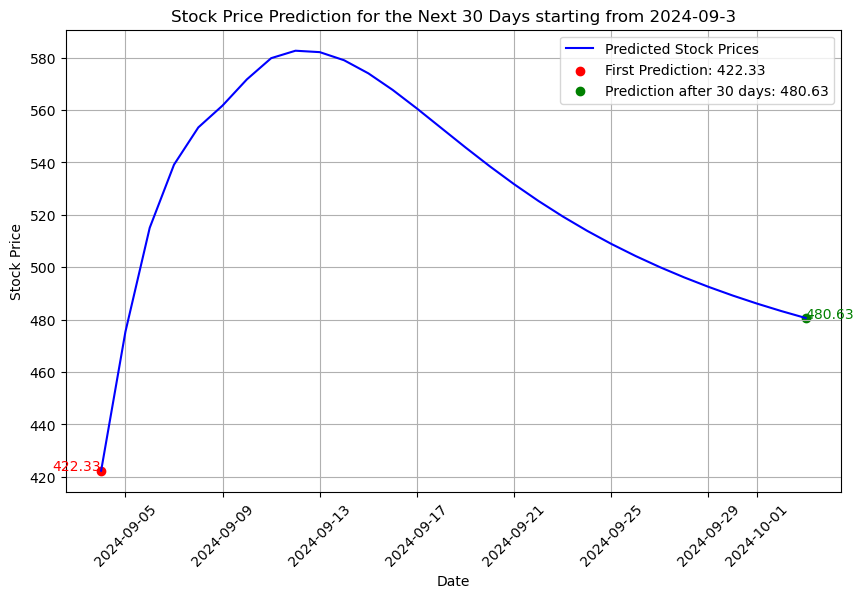

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


model = load_model('stock_prediction_model.keras')


date_to_predict = '2024-09-3' 


last_60_days = data[data['Date'] <= date_to_predict].tail(60)


scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = last_60_days['Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_prices)


X_input = scaled_close.reshape(1, 60, 1)


predicted_prices = []


for i in range(30):
    
    predicted_price_scaled = model.predict(X_input)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    
    predicted_prices.append(predicted_price[0][0])

  
    if i < 5:  
        new_data = close_prices[-1-i].reshape(1, 1, 1)  # Ensure shape is (1, 1, 1)
    else:  
        new_data = predicted_price_scaled.reshape(1, 1, 1)  # Ensure shape is (1, 1, 1)
    
    
    X_input = np.append(X_input[:, 1:, :], new_data, axis=1)


last_date = pd.to_datetime(date_to_predict)
date_range = pd.date_range(last_date, periods=31, freq='D')[1:]  # 31 because we want the next 30 days


plt.figure(figsize=(10, 6))
plt.plot(date_range, predicted_prices, color='blue', label='Predicted Stock Prices')

plt.scatter(date_range[0], predicted_prices[0], color='red', label=f'First Prediction: {predicted_prices[0]:.2f}')

plt.scatter(date_range[29], predicted_prices[29], color='green', label=f'Prediction after 30 days: {predicted_prices[29]:.2f}')


plt.text(date_range[0], predicted_prices[0], f'{predicted_prices[0]:.2f}', color='red', ha='right', fontsize=10)
plt.text(date_range[29], predicted_prices[29], f'{predicted_prices[29]:.2f}', color='green', ha='left', fontsize=10)


plt.title(f'Stock Price Prediction for the Next 30 Days starting from {date_to_predict}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
